In [1]:
import sys, os, getpass

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)

user = getpass.getuser()

if user == "sidsel":
    parquet_path = "/home/sidsel/workspace/sparkdata/parquet"
elif user == "svanhmic":
    parquet_path = "/home/svanhmic/workspace/data/DABAI/sparkdata/parquet"

/home/svanhmic/workspace/DABAI/Workflows


In [3]:
from sample.DataIO import DataIO
data = DataIO(sc,feature_path=parquet_path+"/featureDataCvr.parquet",company_path=parquet_path+"/companyCvrData")
feature_data = data.mergeCompanyFeatureData()

In [5]:
#import data!
 
#from shared.create_dummy_data import DummyData 

#dummy_data = DummyData(sc,1000)
#dummy_data.create_outliers("x",10)
#dummy_data.create_outliers("y",10)
#dummy_data.show()

In [6]:
#Select parameters
from sample.CreateParameters import CreateParameters

params = CreateParameters(feature_data.columns)

In [7]:
params.select_params()

In [13]:
print(params.export_values())
dicKM = {'initialstep': 10, 'optimizer': None, 'seed': 42, 'mindivisbleClusterSize': 1.0, 'model': 'KMeans', 'initialmode': 'random', 'prediction': 'prediction', 'iterations': 10, 'probability': None, 'features': ('x','y','z'), 'label':('label'), 'standardize': True, 'clusters': 2, 'tolerance': 0.0001}#{'initialstep': 10, 'optimizer': None, 'seed': 42, 'mindivisbleClusterSize': 1.0, 'model': 'KMeans', 'initialmode': 'random', 'prediction': 'prediction', 'iterations': 10, 'probability': None, 'features': ('AarsVaerk_1', 'AarsVaerk_2', 'AarsVaerk_3', 'AarsVaerk_4'), 'label':("cvrNummer","navn"), 'standardize': True, 'clusters': 2, 'tolerance': 0.0001}
dicBKM = {'initialstep': 10, 'optimizer': None, 'seed': 42, 'mindivisbleClusterSize': 1.0, 'model': 'BisectingKMeans', 'initialmode': 'random', 'prediction': 'prediction', 'iterations': 10, 'probability': None, 'features': ('x','y','z'), 'label':('label'), 'standardize': True, 'clusters': 2, 'tolerance': 0.0001}#{'initialstep': 10, 'optimizer': None, 'seed': 42, 'mindivisbleClusterSize': 1.0, 'model': 'BisectingKMeans', 'initialmode': 'random', 'prediction': 'prediction', 'iterations': 10, 'probability': None, 'features': ('AarsVaerk_1', 'AarsVaerk_2', 'AarsVaerk_3', 'AarsVaerk_4'), 'label':("cvrNummer","navn"), 'standardize': False, 'clusters': 2, 'tolerance': 0.0001}

# NOTE!!! Data is note standardized due to random variable is between 0-1 and outliers are beyond
dicGMM = {'initialstep': 10, 'optimizer': None, 'seed': 42, 'mindivisbleClusterSize': 1.0, 'model': 'GaussianMixture', 'initialmode': 'random', 'prediction': 'prediction', 'iterations': 10, 'probability': None, 'features': ('x','y','z'), 'label':('label'), 'standardize': False, 'clusters': 10, 'tolerance': 0.0001}#{'initialstep': 10, 'optimizer': None, 'seed': 42, 'mindivisbleClusterSize': 1.0, 'model': 'GaussianMixture', 'initialmode': 'random', 'prediction': 'prediction', 'iterations': 10, 'probability': None, 'features': ('AarsVaerk_1', 'AarsVaerk_2', 'AarsVaerk_3', 'AarsVaerk_4'), 'label':("cvrNummer","navn"), 'standardize': True, 'clusters': 10, 'tolerance': 0.0001} #
#{'features': ('AarsVaerk_1', 'AarsVaerk_2', 'AarsVaerk_3', 'AarsVaerk_4'), 'initialstep': 10, 'standardize': True, 'clusters': 3, 'model': 'KMeans', 'initialmode': 'random', 'prediction': 'Prediction', 'iterations': 10}

{'initialstep': 10, 'optimizer': None, 'seed': 42, 'mindivisbleClusterSize': 1.0, 'model': 'KMeans', 'initialmode': 'random', 'prediction': 'prediction', 'iterations': 10, 'probability': 'cvrNummer', 'features': ('AarsVaerk_1', 'AarsVaerk_2', 'AarsVaerk_3'), 'standardize': True, 'clusters': 10, 'tolerance': 0.0001, 'label': ('cvrNummer',)}


In [14]:
from sample.ExecuteWorkflow import ExecuteWorkflow
from random import random

import numpy as np

execution_model = ExecuteWorkflow()
#print(execution_model.params)
execution_model.params = params.export_values()

In [15]:
runTest = execution_model.run(data=feature_data)

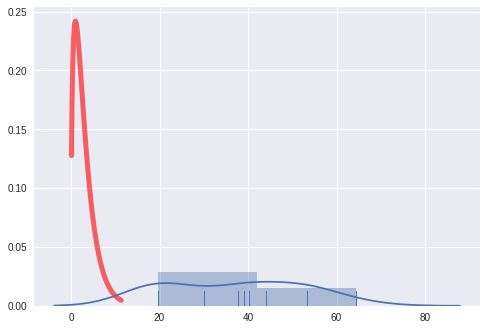

['cvrNummer', 'AarsVaerk_1', 'AarsVaerk_2', 'AarsVaerk_3', 'distances', 'outliers']
+---------+-----------+-----------+-----------+------------------+--------+
|cvrNummer|AarsVaerk_1|AarsVaerk_2|AarsVaerk_3|         distances|outliers|
+---------+-----------+-----------+-----------+------------------+--------+
| 25814363|     1000.0|     1000.0|     1000.0| 53.26355741274298|       1|
| 19687236|     1000.0|      500.0|      200.0|  44.1543484274127|       1|
| 19562786|      500.0|      500.0|     1000.0| 39.10952281668718|       1|
| 83742313|      500.0|      500.0|      500.0|19.587111150296558|       1|
| 26121264|     1000.0|     1000.0|        0.0|  64.4637591261001|       1|
| 15771100|     1000.0|      500.0|      500.0| 30.06940448477987|       1|
| 19056171|      500.0|      500.0|      500.0|19.587111150296558|       1|
| 16406899|      500.0|      200.0|      500.0| 40.18682410118911|       1|
| 26123445|      500.0|      500.0|      500.0|19.587111150296558|       1|
| 19

,cvrNummer,AarsVaerk_1,AarsVaerk_2,AarsVaerk_3,distances,outliers
0,26121264,1000.0,1000.0,0.0,64.463759,1
1,25814363,1000.0,1000.0,1000.0,53.263557,1
2,65305216,1000.0,1000.0,1000.0,53.263557,1
3,20161612,1000.0,1000.0,1000.0,53.263557,1
4,18537176,1000.0,1000.0,1000.0,53.263557,1
5,14769005,1000.0,1000.0,1000.0,53.263557,1
6,30345363,1000.0,1000.0,1000.0,53.263557,1
7,19687236,1000.0,500.0,200.0,44.154348,1
8,13496188,200.0,500.0,500.0,40.304443,1
9,26390206,200.0,500.0,500.0,40.304443,1


In [16]:
from sample.ShowKmeans import ShowResults
results = ShowResults(execution_model.params)
results.select_prototypes(runTest)

['cvr', 'dhcp', 'ar1', 'ar2', 'dist', 'outliers']

In [19]:
runTest.filter(runTest.cvrNummer == 26390222).show()

+---------+--------------------+-----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+---------+---------+---------+---------+---------+-----------------+-----------------+------------------+------------------+------+------+------+------+------+------+----------------+---------------+----------------+-------------------+-------------------+--------------------+----------+--------------------+
|cvrNummer|              status|label|AarsVaerk_1|AarsVaerk_2|AarsVaerk_3|AarsVaerk_4|AarsVaerk_5|AarsVaerk_6|AarsVaerk_7|AarsVaerk_8|AarsVaerk_9|AarsVaerk_10|AarsVaerk_11|AarsVaerk_12|AarsVaerk_13|AarsVaerk_14|AarsVaerk_15|medArb_1|medArb_2|medArb_3|medArb_4|medArb_5|medArb_6|medArb_7|medArb_8|medArb_9|medArb_10|medArb_11|medArb_12|medArb_13|medArb_14|medArb_15|      avgV